
Simple application of a supervised neural network 

designed by Tom Watters 

ideas and concepts taken from Tariq Rashid's book "how to make your own neural network


In [14]:
# import relevant libraries 
import numpy as np
import matplotlib.pyplot
import scipy.special
%matplotlib inline


In [1]:

class NeuralNetwork:
    
    # Setup the neural network
    def __init__(self, Inputnodes,Hiddennodes,Outputnodes,LearningRate):
        
        # set no. of nodes for each layer 
        self.inodes = Inputnodes
        self.hnodes = Hiddennodes
        self.onodes = Outputnodes
        
        # set the learning Rate
        self.lr = LearningRate
        
        # link weight matrices
        
        #      weights inside the arrays are w_i_j, where link id from node i to node j in the next layer
        
        #      W11  W21  W31
        #      W12  W22  W32
        #      W13  W23  W33
        #      W14  W24  W34      
        
        # uncomment code relevant to your random values setting 
        
        # True random starting arrays
        self.wih = (np.random.rand(self.hnodes,self.inodes)-0.5)
        self.who = (np.random.rand(self.onodes,self.hnodes)-0.5)
        
        # normally distributed random values -- needs fixing
        # self.wih = (np.random.normal(0.0,pow(self.inodes,-0.5), (self.hnodes,self.inodes))
        # self.who = (np.random.normal(0.0,pow(self.hnodes,-0.5), (self.onodes,self.hnodes))
        
        # activation function is the sigmoid 
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # Train the network
    def train(self,inputs_list, targets_list):
        
        # convert inputs into a 2x2 array 
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer 
        hidden_inputs = np.dot(self.wih,inputs)
        
        # calculate the emerging hidden layer outputs
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the signals to the final output layer 
        final_inputs =np.dot(self.who, hidden_outputs)
        
        # calculate the final outputs of the final output layer 
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target-actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights recombined at hidden nodes 
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers 
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    
    # Query the network
    def query(self, inputs_list):
        
        # convert inputs list to 2x2 array
        inputs =np.array(inputs_list, ndmin=2).T
        
        # calculate hidden layer inputs and outputs
        hidden_inputs = np.dot(self.wih,inputs)  
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into hidden layer 
        final_inputs = np.dot(self.who,hidden_outputs)
        
        # calculate the final outputs 
        final_outputs = self.activation_function(final_inputs)
        
        # return the outputs :-
        return final_outputs
    
    

In [3]:
# Conditioning Inputs
scaled_input = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01
print(scaled_input)


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [4]:
# configure the output nodes 
onodes = 10
targets = np.zeros(onodes)+0.01
targets[int(all_values[0])] = 0.99

print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]


In [5]:
input_nodes = 784
hidden_nodes = 190
output_nodes = 10

#learning rate set is 0.2
learning_rate = 0.25

#create neural netwrok instance 
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


#import the training Dataset .csv into a list 
training_data_file = open("mnist_dataset/mnist_train.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()

# -----------   train the network  -------------- 

# epochs = the number of times the training data is used to train the network
epochs = 1

for e in range(epochs):
    
    for record in training_data_list:
        # go through the records and segment the data on each "," 
        all_values = record.split(',')

        # scale and shift the outputs 
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01

        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01

        # all_values[0] is the target label for this record 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass



In [6]:
# lets test the network

# load the mnist test data CSV file into a list 
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [7]:
# test the neural network

# scorecard for how well the nework performs, initially empty
scorecard = []

# go through all the records in the test data set 
for record in test_data_list:
    
    #split the record by ',' commas 
    all_values = record.split(',')
    
    # correct answer is first value 
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    
    # scale and shift the inputs 
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    
    # query the network 
    outputs = n.query(inputs)
    
    # the index of the highest value corresponds to the label 
    label = np.argmax(outputs)
    print(label, "networks answer")
    
    # append correct and incorrect to list 
    if (label == correct_label):
        
        #networks answer matches correct answer, add 1 to scorecard 
        scorecard.append(1)
        
    else:
        
        # networks answer does not match the correct answer, add 0 to scorecard
        scorecard.append(0)
        
        pass
    pass

7 correct label
7 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
5 correct label
6 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
6 correct label
6 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
1 correct labe

9 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
3 correct label
3 networks answer
8 correct label
9 networks answer
2 correct label
2 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
7 correct label
7 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
2 correct label
2 networks ans

4 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
0 correct label
6 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
5 correct label
8 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
6 correct label
6 networks ans

7 networks answer
9 correct label
9 networks answer
6 correct label
5 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
8 correct label
8 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
5 correct label
8 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
7 correct label
1 networks answer
1 correct label
1 networks answer
5 correct label
5 networks ans

8 correct label
8 networks answer
6 correct label
4 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
3 correct labe

1 correct label
1 networks answer
5 correct label
5 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
5 correct label
5 networks answer
0 correct label
4 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
1 correct label
1 networks answer
7 correct label
2 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
3 correct labe

8 networks answer
5 correct label
5 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
2 correct label
2 networks answer
3 correct label
8 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
7 correct label
0 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
6 correct label
0 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
8 correct label
1 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
4 correct label
9 networks answer
6 correct label
6 networks ans

0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
1 correct label
1 networks answer
6 correct label
6 networks answer
8 correct label
8 networks answer
3 correct label
3 networks answer
8 correct label
3 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
2 correct label
1 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
2 correct label
2 networks ans

7 networks answer
8 correct label
8 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
9 correct label
4 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
4 correct label
6 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
1 correct label
1 networks ans

2 networks answer
6 correct label
6 networks answer
6 correct label
6 networks answer
5 correct label
5 networks answer
7 correct label
7 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
8 correct label
3 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
6 correct label
6 networks ans

0 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
8 correct label
8 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
9 correct label
3 networks answer
1 correct label
1 networks answer
2 correct label
3 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
6 correct label
6 networks answer
6 correct label
6 networks answer
7 correct label
0 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
4 correct label
4 networks ans

7 correct label
7 networks answer
9 correct label
9 networks answer
4 correct label
4 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
6 correct label
6 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
9 correct label
4 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
4 correct labe

6 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
5 correct label
9 networks answer
5 correct label
8 networks answer
7 correct label
7 networks answer
9 correct label
9 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
5 correct label
5 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
9 correct label
4 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
5 correct label
6 networks answer
8 correct label
8 networks ans

4 networks answer
5 correct label
5 networks answer
7 correct label
7 networks answer
6 correct label
6 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
3 correct label
3 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
8 correct label
8 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
8 correct label
8 networks ans

0 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
2 correct label
2 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
5 correct label
5 networks ans

7 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
7 correct label
9 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
3 correct label
3 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
9 correct label
9 networks ans

7 correct label
9 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
7 correct label
9 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct labe

1 correct label
1 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
7 correct label
7 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
8 correct labe

1 correct label
1 networks answer
5 correct label
5 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
3 correct label
3 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
9 correct label
0 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
3 correct labe

3 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
3 correct label
3 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
5 correct label
5 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
3 correct label
3 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
5 correct label
5 networks ans

9 correct label
9 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
8 correct label
8 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
8 correct label
9 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
5 correct label
5 networks answer
2 correct label
2 networks answer
9 correct labe

9 correct label
9 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
0 correct label
0 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
2 correct labe

0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
2 correct label
2 networks answer
1 correct labe

2 correct label
9 networks answer
3 correct label
2 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
9 correct label
9 networks answer
3 correct label
2 networks answer
2 correct label
2 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
4 correct label
4 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
4 correct label
4 networks answer
2 correct labe

1 networks answer
5 correct label
5 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
6 correct label
6 networks answer
8 correct label
8 networks answer
8 correct label
8 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
8 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks ans

9 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
0 correct label
0 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
5 correct label
5 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
2 correct label
2 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
5 correct label
8 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
8 correct label
8 networks answer
9 correct label
9 networks ans

4 networks answer
1 correct label
1 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
0 correct label
0 networks answer
0 correct label
0 networks answer
3 correct label
3 networks answer
7 correct label
7 networks answer
1 correct label
1 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
6 correct label
6 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
3 correct label
3 networks answer
8 correct label
8 networks answer
6 correct label
6 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
9 correct label
9 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
7 correct label
7 networks ans

1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
9 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
4 correct label
4 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
2 correct label
2 networks answer
9 correct label
9 networks answer
3 correct label
3 networks answer
9 correct label
9 networks answer
3 correct label
3 networks ans

5 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
8 correct label
9 networks answer
2 correct label
2 networks answer
6 correct label
6 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
3 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks ans

6 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
7 correct label
7 networks answer
2 correct label
3 networks answer
6 correct label
6 networks answer
5 correct label
6 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer
7 correct label
7 networks answer
8 correct label
8 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
2 correct label
2 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
5 correct label
5 networks answer
6 correct label
6 networks answer


In [8]:
# calculate the performance score 

scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.9517



Above is the main Algorithm, below you can find ways of reading out specific values, outputs and data for specific values in the array


correct label = 6


array([[8.74459297e-03],
       [3.01537620e-03],
       [2.24128699e-03],
       [2.55127171e-03],
       [2.29547277e-03],
       [1.70991285e-03],
       [9.96113165e-01],
       [3.55017759e-04],
       [3.48711873e-04],
       [1.36884560e-03]])

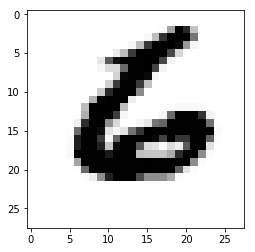

In [15]:
# get the first test record
all_values = test_data_list[9999].split(',')

# print the label
print('correct label = ' + all_values[0])

# print the data as a mpl sketch
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')

# lets query the network 
n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

# we can see that the probability of 7 is much higher and therefore demonstates the networks guess 

In [ ]:
# return the length of the data set 
# len(data_list)

In [ ]:
# print the raw data 
# data_list[0]

In [18]:
# print a character in the dataset, converted to greyscale
all_values = data_list[59].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')

NameError: name 'data_list' is not defined

In [ ]:
# get the first test record
all_values = test_data_list[0].split(',')

# print the label
print(all_values[0])

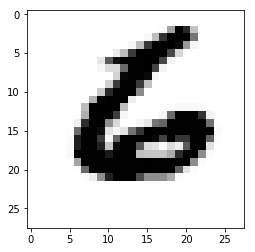

In [17]:
# print the data as a mpl sketch
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [ ]:
# display the scorecard 
# print(scorecard)